In [13]:
import joblib
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from custom_transformers.standard_true_false import standard_true_false

In [14]:
seed = 15
np.random.seed(seed)
n_jobs = joblib.cpu_count() - 1

In [15]:
with open("dataset.pkl", "rb") as f:
    DATA = pickle.load(f)
    pheno = DATA["pheno"]
    X_gpa = standard_true_false.fit_transform(DATA["X_gpa"])
    X_snps = standard_true_false.fit_transform(DATA["X_snps"])
    X_genexp = StandardScaler().fit_transform(DATA["X_genexp"])

In [16]:
X_gpa_genexp = np.concatenate([X_gpa, X_genexp], axis=1)
X_snps_genexp = np.concatenate([X_snps, X_genexp], axis=1)
X_gpa_snps = np.concatenate([X_gpa, X_snps], axis=1)
X_all = np.concatenate([X_gpa, X_snps, X_genexp], axis=1)
y = pheno["Colistin"].to_numpy()

In [17]:
tsne = TSNE(n_components=2, init="pca", learning_rate="auto", random_state=seed, n_jobs=n_jobs)

/home/vadim/miniconda3/envs/app-stat/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<AxesSubplot: xlabel='dim1', ylabel='dim2'>

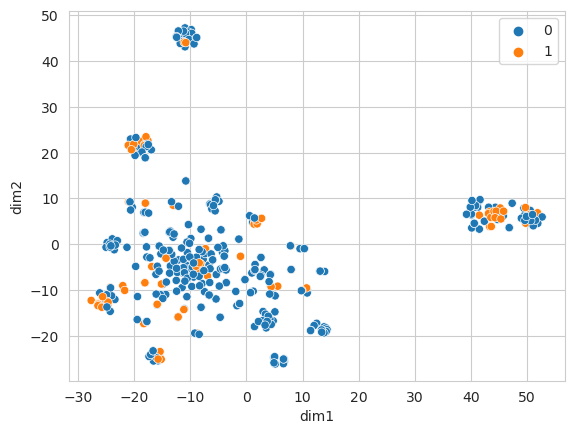

In [18]:
X = pd.DataFrame(X_gpa, index=pheno["strain_ids"])
Z = tsne.fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["dim1"] = Z[:,0]
df["dim2"] = Z[:,1]

sns.scatterplot(x="dim1", y="dim2", hue=df.y.tolist(), data=df)

/home/vadim/miniconda3/envs/app-stat/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<AxesSubplot: xlabel='dim1', ylabel='dim2'>

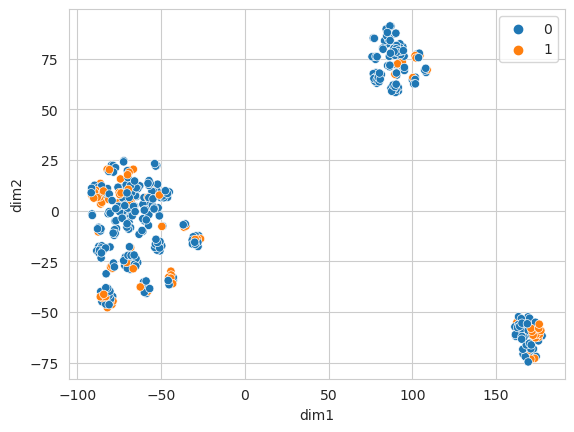

In [19]:
X = pd.DataFrame(X_snps, index=pheno["strain_ids"])
Z = tsne.fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["dim1"] = Z[:,0]
df["dim2"] = Z[:,1]

sns.scatterplot(x="dim1", y="dim2", hue=df.y.tolist(), data=df)

/home/vadim/miniconda3/envs/app-stat/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<AxesSubplot: xlabel='dim1', ylabel='dim2'>

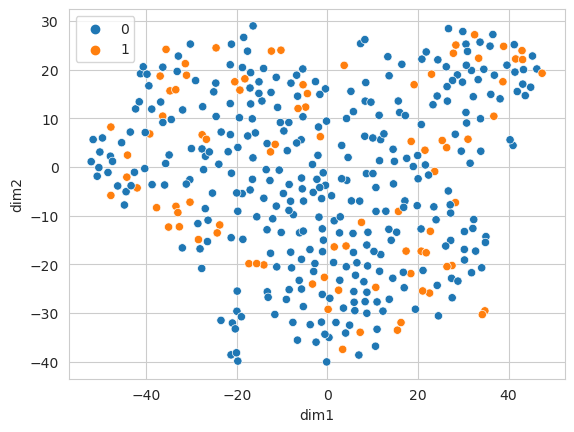

In [20]:
X = pd.DataFrame(X_genexp, index=pheno["strain_ids"])
Z = tsne.fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["dim1"] = Z[:,0]
df["dim2"] = Z[:,1]

sns.scatterplot(x="dim1", y="dim2", hue=df.y.tolist(), data=df)

/home/vadim/miniconda3/envs/app-stat/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<AxesSubplot: xlabel='dim1', ylabel='dim2'>

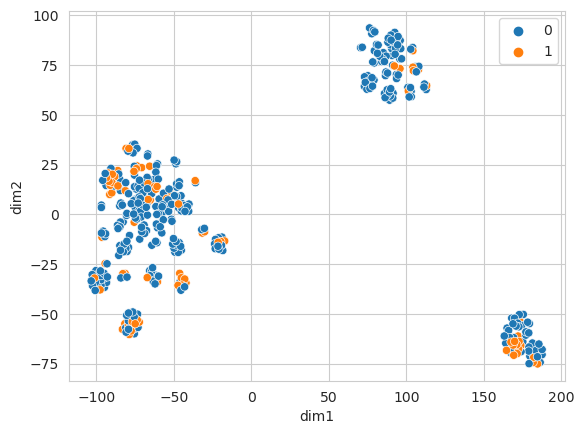

In [21]:
X = pd.DataFrame(X_gpa_snps, index=pheno["strain_ids"])
Z = tsne.fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["dim1"] = Z[:,0]
df["dim2"] = Z[:,1]

sns.scatterplot(x="dim1", y="dim2", hue=df.y.tolist(), data=df)

/home/vadim/miniconda3/envs/app-stat/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<AxesSubplot: xlabel='dim1', ylabel='dim2'>

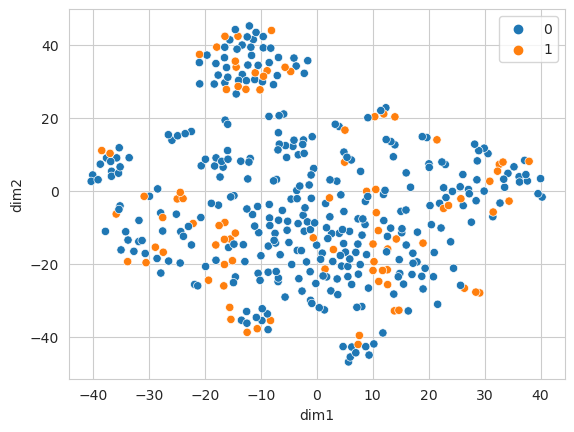

In [22]:
X = pd.DataFrame(X_gpa_genexp, index=pheno["strain_ids"])
Z = tsne.fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["dim1"] = Z[:,0]
df["dim2"] = Z[:,1]

sns.scatterplot(x="dim1", y="dim2", hue=df.y.tolist(), data=df)

/home/vadim/miniconda3/envs/app-stat/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<AxesSubplot: xlabel='dim1', ylabel='dim2'>

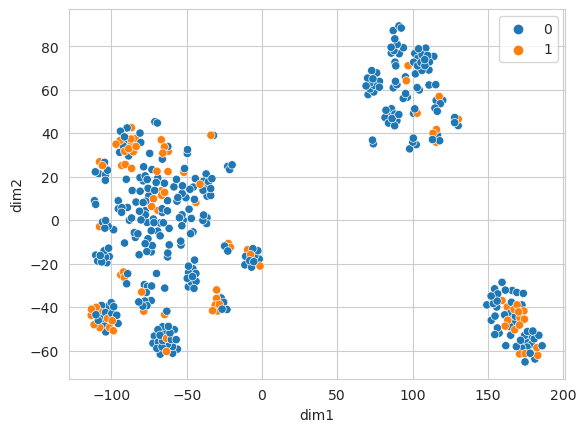

In [23]:
X = pd.DataFrame(X_snps_genexp, index=pheno["strain_ids"])
Z = tsne.fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["dim1"] = Z[:,0]
df["dim2"] = Z[:,1]

sns.scatterplot(x="dim1", y="dim2", hue=df.y.tolist(), data=df)

/home/vadim/miniconda3/envs/app-stat/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<AxesSubplot: xlabel='dim1', ylabel='dim2'>

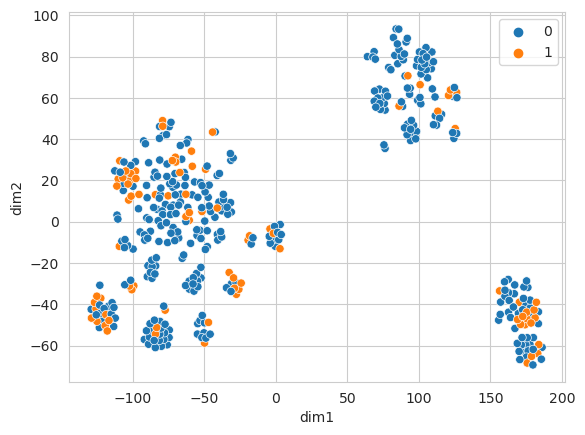

In [24]:
X = pd.DataFrame(X_all, index=pheno["strain_ids"])
Z = tsne.fit_transform(X)

df = pd.DataFrame()
df["y"] = y
df["dim1"] = Z[:,0]
df["dim2"] = Z[:,1]

sns.scatterplot(x="dim1", y="dim2", hue=df.y.tolist(), data=df)